In [7]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn import tree, ensemble
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [1]:
from sklearn import datasets

diabetes = datasets.load_diabetes()

In [2]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [4]:
x = diabetes.data
y = diabetes.target
feature = diabetes.feature_names

In [5]:
x, x.shape, feature

(array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 (442, 10),
 ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'])

In [6]:
y, y.shape

(array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
        128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
        150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
        200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
         42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
         83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
        104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
        173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
        107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
         60., 174., 259., 178., 128., 

In [9]:
# 데이터 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [10]:
x_regu = scaler.transform(x)

In [11]:
x_regu, x_regu.shape

(array([[ 0.80050009,  1.06548848,  1.29708846, ..., -0.05449919,
          0.41855058, -0.37098854],
        [-0.03956713, -0.93853666, -1.08218016, ..., -0.83030083,
         -1.43655059, -1.93847913],
        [ 1.79330681,  1.06548848,  0.93453324, ..., -0.05449919,
          0.06020733, -0.54515416],
        ...,
        [ 0.87686984,  1.06548848, -0.33441002, ..., -0.23293356,
         -0.98558469,  0.32567395],
        [-0.9560041 , -0.93853666,  0.82123474, ...,  0.55838411,
          0.93615545, -0.54515416],
        [-0.9560041 , -0.93853666, -1.53537419, ..., -0.83030083,
         -0.08871747,  0.06442552]]),
 (442, 10))

In [21]:
# 랜덤 회귀모델

model = ensemble.RandomForestRegressor()

In [22]:
# 정규화하지 않은 모델 model_1
model_1 = model.fit(x,y)
model_1

RandomForestRegressor()

In [33]:
# 정규화한 모델 model_2
model_2 = model.fit(x_regu,y)
model_2

RandomForestRegressor()

In [24]:
# 결정계수 표시
model_1.score(x, y)
# 92% 설명력

0.9210844633573584

In [34]:
# 결정계수 표시
model_2.score(x_regu, y)
# 92% 설명력

0.9197404854340614

In [25]:
r2 = model_1.score(x,y)
print('결정계수:' , r2)

결정계수: 0.9210844633573584


In [26]:
# 예측
model_1.predict(x)

array([179.31,  78.27, 154.14, 190.08, 121.27, 100.81, 114.51,  98.47,
       125.11, 247.84, 103.21, 101.11, 146.68, 181.32, 111.41, 181.77,
       187.35, 157.44, 102.21, 133.51,  84.24,  76.56,  78.29, 243.57,
       174.87, 177.36, 123.81, 114.  , 134.31, 253.13, 134.43,  61.95,
       312.02,  94.17,  70.67, 112.61, 246.91, 232.5 , 248.66, 122.5 ,
       138.49,  84.11,  82.63,  94.  , 230.55,  68.96, 162.29, 138.84,
        80.04, 153.41, 136.57, 202.94,  83.73, 111.43, 158.29, 111.31,
       110.28,  57.24, 146.61, 158.03,  75.27, 145.45,  54.57, 121.21,
        97.18, 162.58, 141.28,  95.86, 130.54, 144.77,  61.71, 261.7 ,
       188.82, 108.04, 116.96,  72.55, 177.91, 165.43, 218.15, 127.17,
       153.04,  77.14,  66.66, 187.84,  67.85, 150.28,  71.84, 152.24,
        59.84,  98.49,  91.07, 158.7 ,  89.29,  90.94,  90.69, 156.9 ,
       164.14, 253.63, 102.87,  97.72, 158.3 , 100.85, 257.48, 178.09,
       112.5 ,  72.94, 127.68, 135.68, 234.91, 106.79, 101.32,  75.55,
      

In [27]:
feature

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

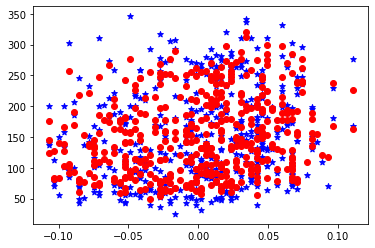

In [29]:
# 그래프 표시 - age
plt.scatter(x[:,0], y, marker = '*', color = 'blue')
plt.scatter(x[:,0], model_1.predict(x), marker = 'o', color = 'red')
plt.show()

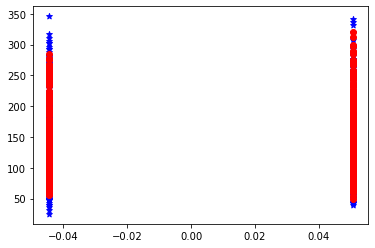

In [30]:
# 그래프 표시 - sex
plt.scatter(x[:,1], y, marker = '*', color = 'blue')
plt.scatter(x[:,1], model_1.predict(x), marker = 'o', color = 'red')
plt.show()

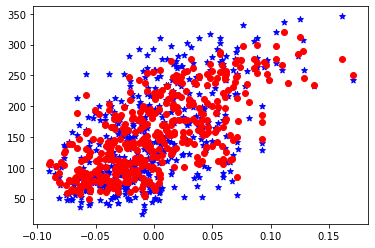

In [31]:
# 그래프 표시 - BMI
plt.scatter(x[:,2], y, marker = '*', color = 'blue')
plt.scatter(x[:,2], model_1.predict(x), marker = 'o', color = 'red')
plt.show()